In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [541]:
df = pd.read_csv("C:/Users/asus/Downloads/logistic_regression.csv")
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# EDA

In [5]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [154]:
df.shape

(396030, 27)

In [13]:
loan_status = df['loan_status'].value_counts(normalize=True)
loan_status

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

- **80% of the customers have fully paid their loan amount**

In [20]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [24]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

<AxesSubplot:xlabel='application_type', ylabel='count'>

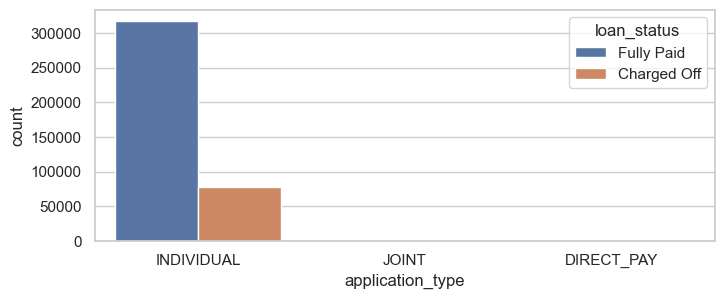

In [155]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x='application_type', hue='loan_status')

In [156]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

### The feature "application_type" has no significance to the target variable "loan_status", only one category dominates almost 100%. hence it can be dropped in model training

In [29]:
# Checking the categories in features having <= 20 categories
for i in df.columns:
    if df[i].nunique() <=20:
        print(i, '--->', df[i].nunique())

term ---> 2
grade ---> 7
emp_length ---> 11
home_ownership ---> 6
verification_status ---> 3
loan_status ---> 2
purpose ---> 14
pub_rec ---> 20
initial_list_status ---> 2
application_type ---> 3
pub_rec_bankruptcies ---> 9


In [41]:
# Unique values of categorical variables
print('Unique Values for Categorical Variables:')
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col} :')
    print(df[col].value_counts())
    print()

Unique Values for Categorical Variables:
term :
 36 months    302005
 60 months     94025
Name: term, dtype: int64

grade :
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

sub_grade :
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

emp_title :
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Hi

In [115]:
df.select_dtypes(include='number')

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0


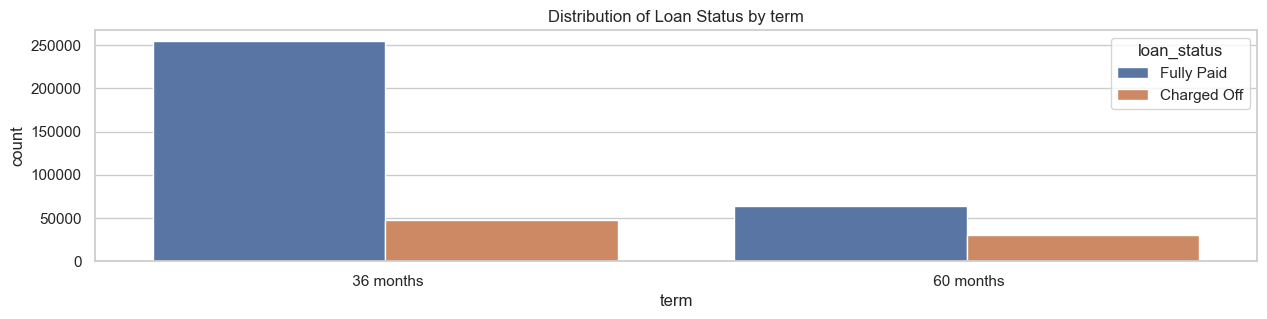

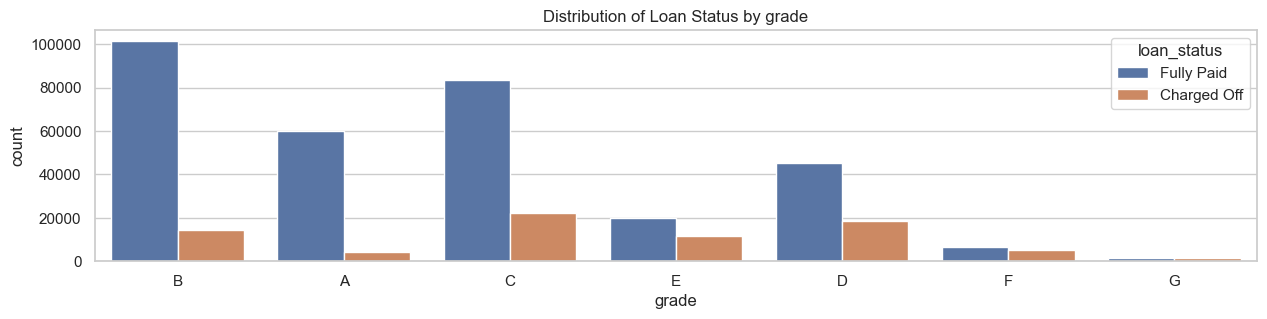

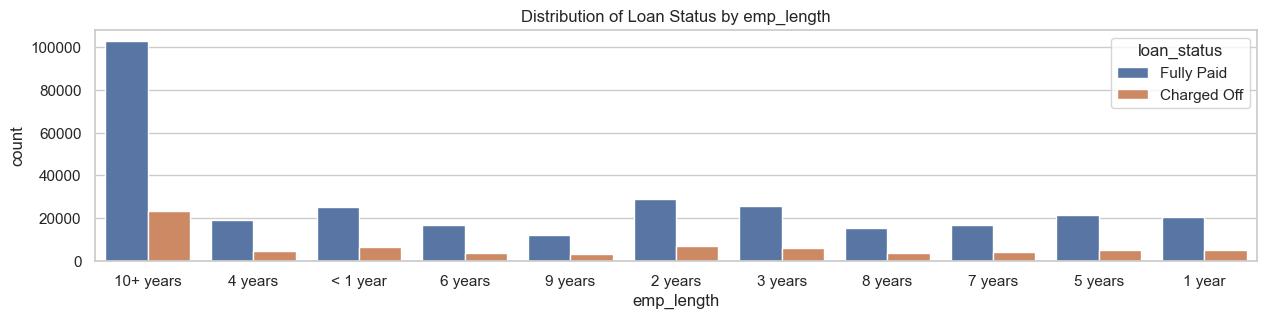

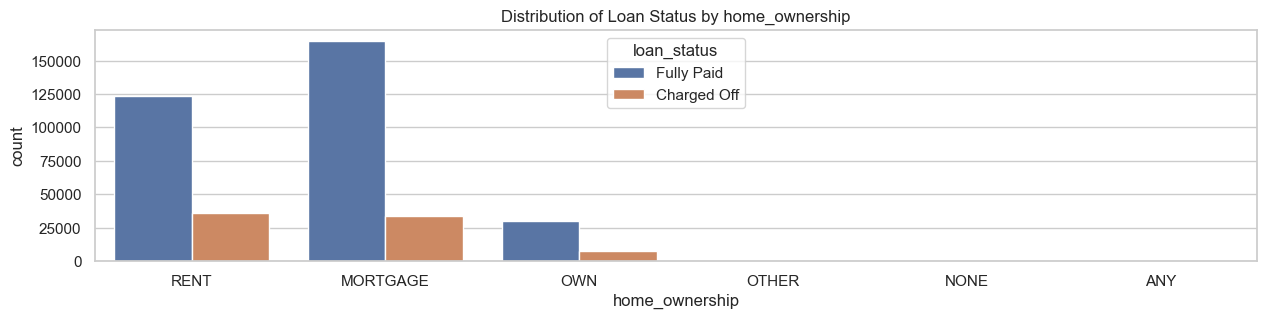

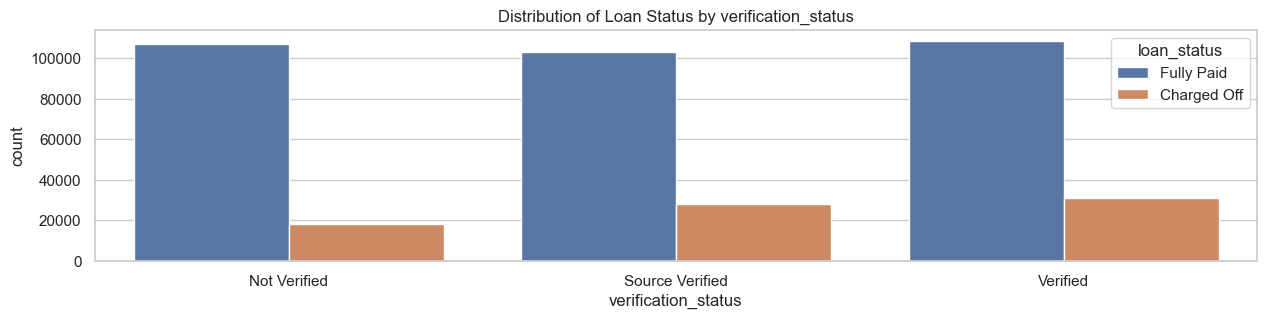

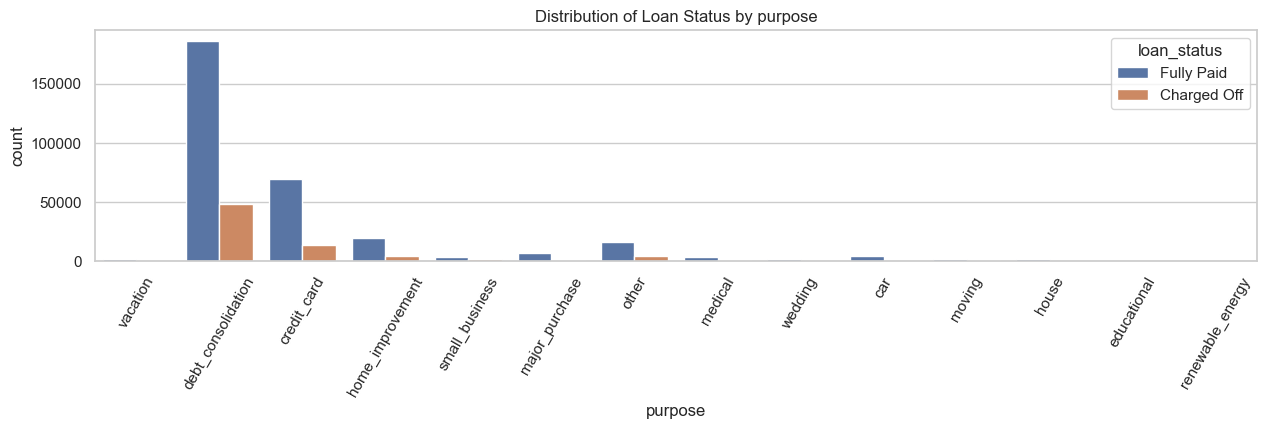

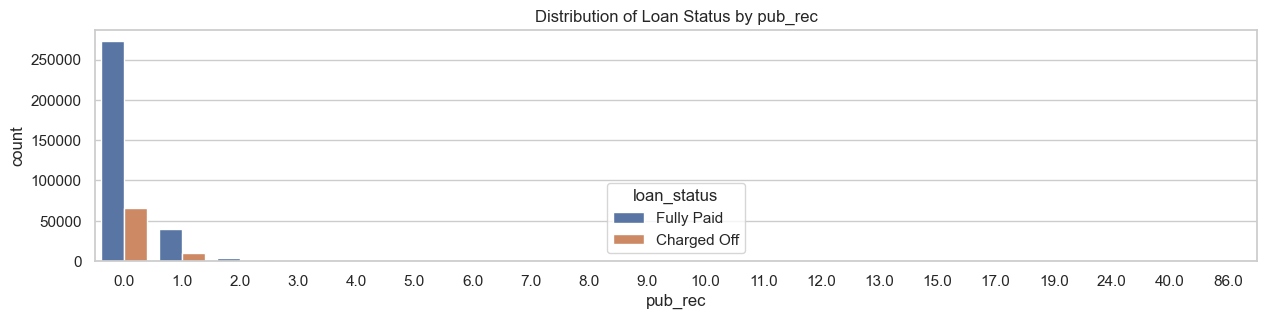

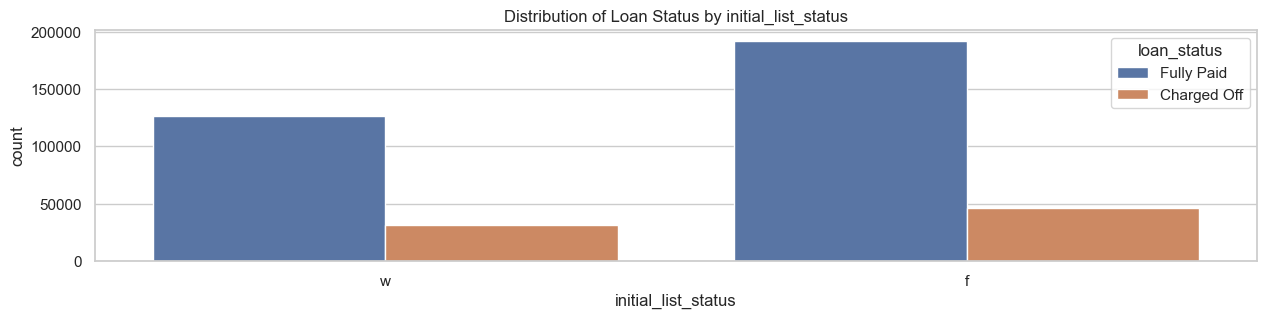

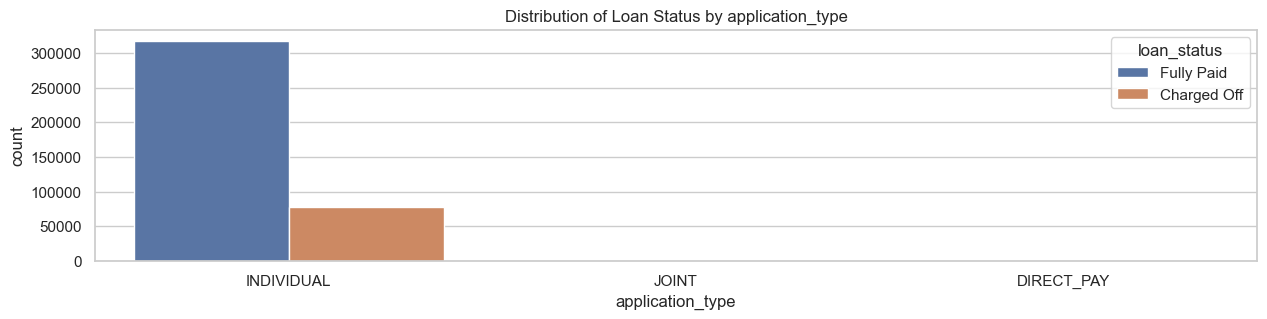

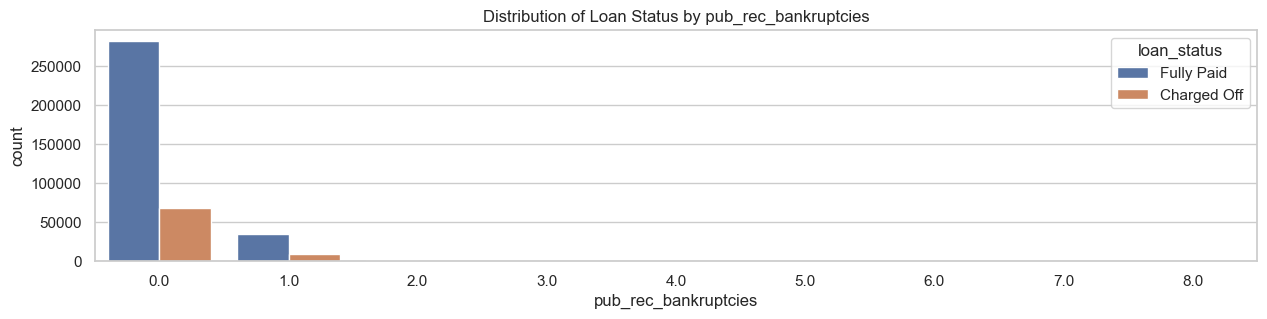

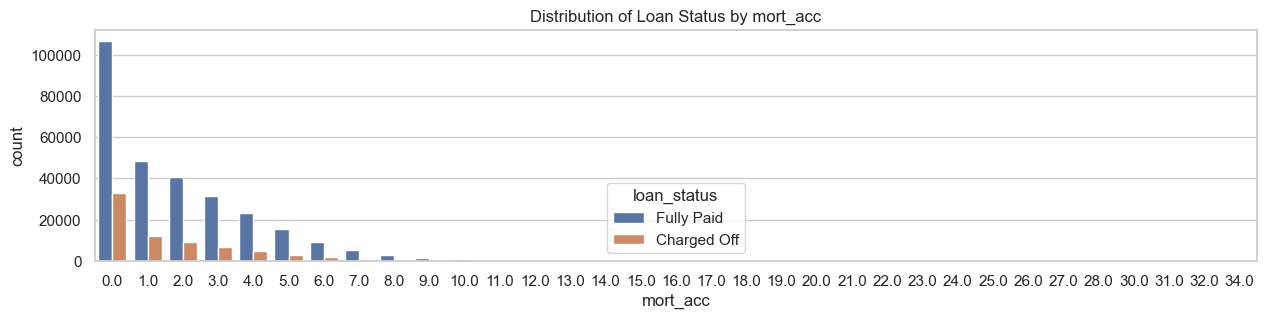

In [114]:
# Count plot for all the categorical variables
categorical_vars = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 
                    'pub_rec', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies', 'mort_acc']

for col in categorical_vars:
    plt.figure(figsize=(15, 3))
    sns.countplot(x=col, hue='loan_status', data=df)
    if col == 'purpose':
        plt.xticks(rotation=60)
    plt.title(f'Distribution of Loan Status by {col}')
    plt.show()


### 36 months of loan term has higher percentage of 'Fully Paid' Loan_status.
### When features 'pub_rec' and 'pub_rec_bankruptcies' are >1, there is no loan, this can be ustilized for feature engineering, may be to create new features

In [98]:
df['home_ownership'].value_counts(normalize=True)*100

MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.028281
NONE         0.007828
ANY          0.000758
Name: home_ownership, dtype: float64

### The majority of people have home ownership as :
- **MORTAGE : This is about 50%.**

- Next highest is: **RENT : 40%**

In [108]:
# total number of loans for each grade
total_loans_per_grade = df['grade'].value_counts()

# number of 'Fully Paid' loans for each grade
fully_paid_loans_per_grade = df[df['loan_status'] == 'Fully Paid']['grade'].value_counts()

# percentage of 'Fully Paid' loans for each grade
fully_paid_percentage_per_grade = (fully_paid_loans_per_grade / total_loans_per_grade) * 100

print("Percentage of 'Fully Paid' loans for each grade:")
print(fully_paid_percentage_per_grade)


Percentage of 'Fully Paid' loans for each grade:
B    87.426951
C    78.819100
A    93.712122
D    71.132171
E    62.636560
F    57.212029
G    52.161100
Name: grade, dtype: float64


###  Calculating on each grade, the highest percentage of loans are paid off by grade A, compared to other grades

# Outliers detection adn treatment

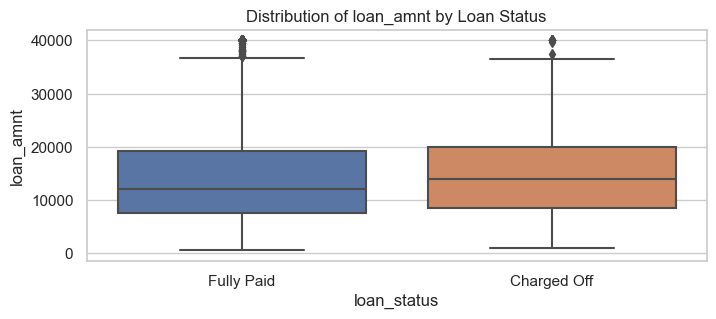

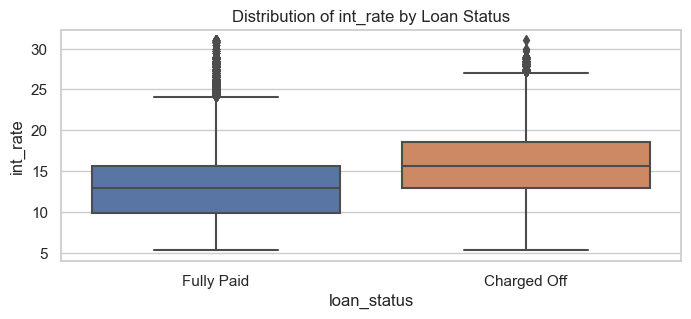

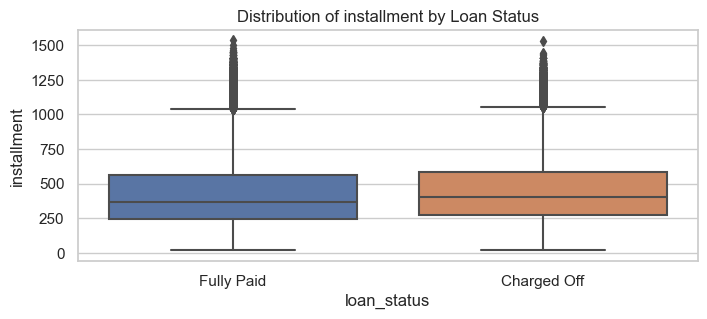

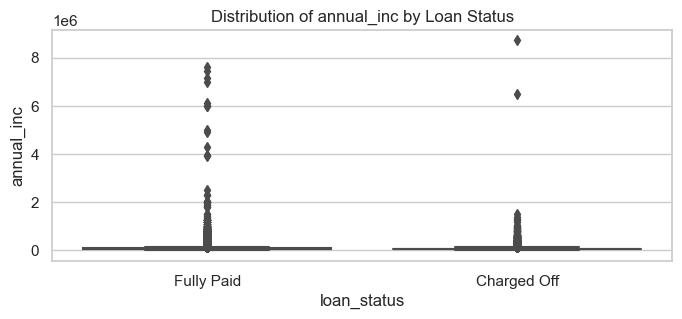

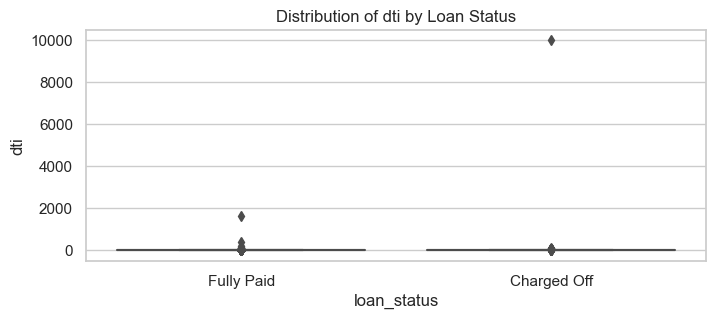

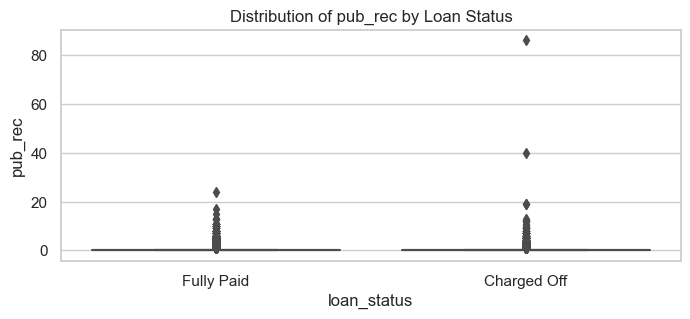

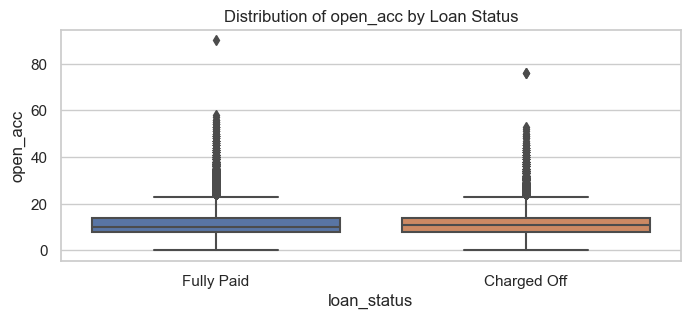

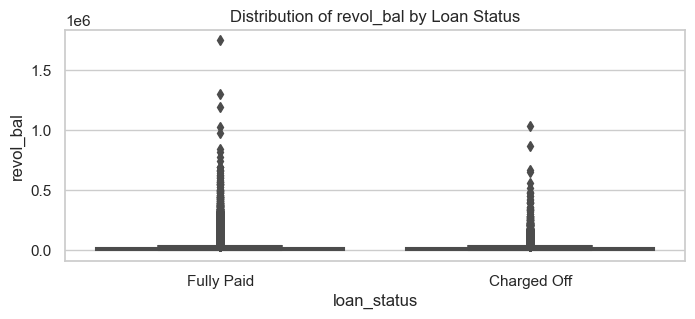

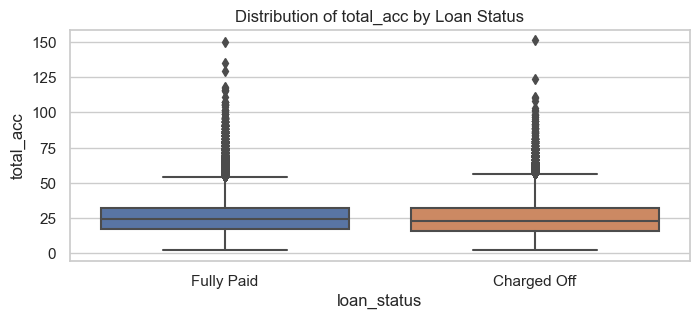

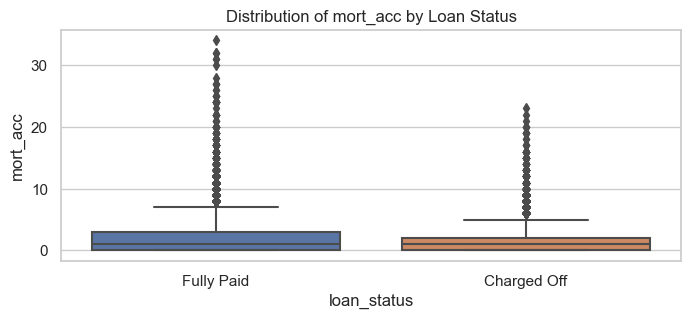

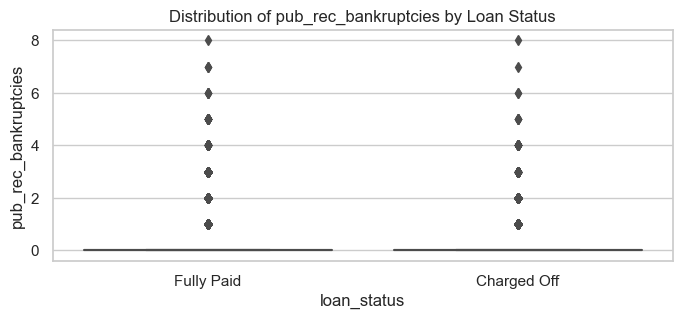

In [84]:
# Box plot for numeric variables by loan_status
numeric_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'pub_rec', 'open_acc', 'revol_bal', 
                'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

for var in numeric_vars:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x='loan_status', y=var, data=df)
    plt.title(f'Distribution of {var} by Loan Status')
    plt.show()


In [487]:
# Defing a function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

## Removing outliers from the columns "dti", "annual_inc", "open_acc" and "rev_balance"

In [542]:
outlier_columns = ["dti", "annual_inc", "open_acc", "revol_bal"]
df = remove_outliers(df, outlier_columns)

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

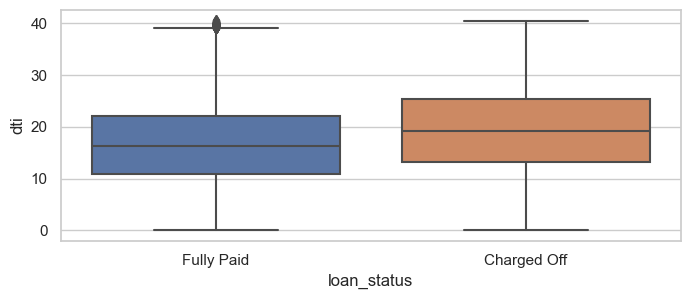

In [543]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='loan_status', y='dti', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

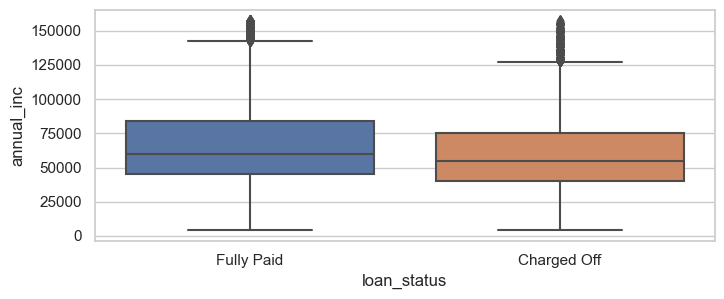

In [160]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='loan_status', y='annual_inc', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

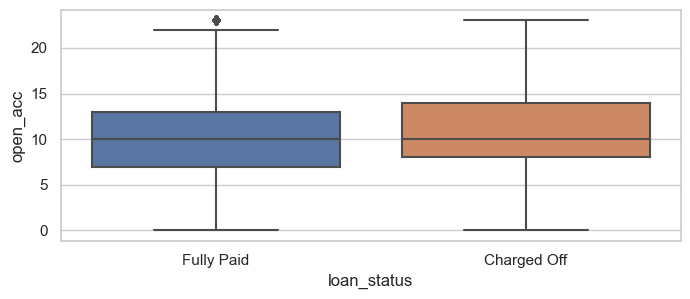

In [145]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='loan_status', y='open_acc', data=df)

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

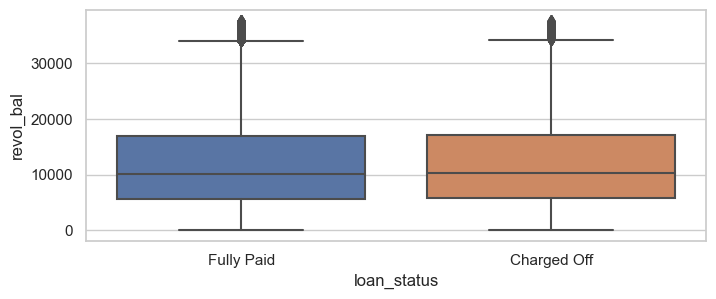

In [189]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='loan_status', y='revol_bal', data=df)

## The feature 'revol_bal' has same median for both the loan_status. This feature can be dropped in model training

# Correlation and Treatment

In [162]:
df.corr(method='spearman')

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.136591,0.966980,0.452706,0.062948,0.193731,-0.088490,0.446069,0.097894,0.215537,0.199463,-0.093270
int_rate,0.136591,1.000000,0.145299,-0.092412,0.170675,0.002550,0.069802,0.017422,0.309684,-0.057087,-0.099902,0.058440
installment,0.966980,0.145299,1.000000,0.433686,0.066540,0.187150,-0.082129,0.439161,0.127245,0.194354,0.169009,-0.088016
annual_inc,0.452706,-0.092412,0.433686,1.000000,-0.202571,0.209984,-0.023964,0.318542,0.036352,0.309880,0.343299,-0.045229
dti,0.062948,0.170675,0.066540,-0.202571,1.000000,0.318960,-0.035354,0.251918,0.179794,0.235292,-0.048725,-0.028791
open_acc,0.193731,0.002550,0.187150,0.209984,0.318960,1.000000,-0.004257,0.338569,-0.150686,0.642498,0.122485,-0.009309
pub_rec,-0.088490,0.069802,-0.082129,-0.023964,-0.035354,-0.004257,1.000000,-0.196398,-0.090788,0.054197,0.056288,0.870454
revol_bal,0.446069,0.017422,0.439161,0.318542,0.251918,0.338569,-0.196398,1.000000,0.428933,0.253502,0.180093,-0.188318
revol_util,0.097894,0.309684,0.127245,0.036352,0.179794,-0.150686,-0.090788,0.428933,1.000000,-0.113456,-0.012703,-0.085611
total_acc,0.215537,-0.057087,0.194354,0.309880,0.235292,0.642498,0.054197,0.253502,-0.113456,1.000000,0.400154,0.064128


<AxesSubplot:>

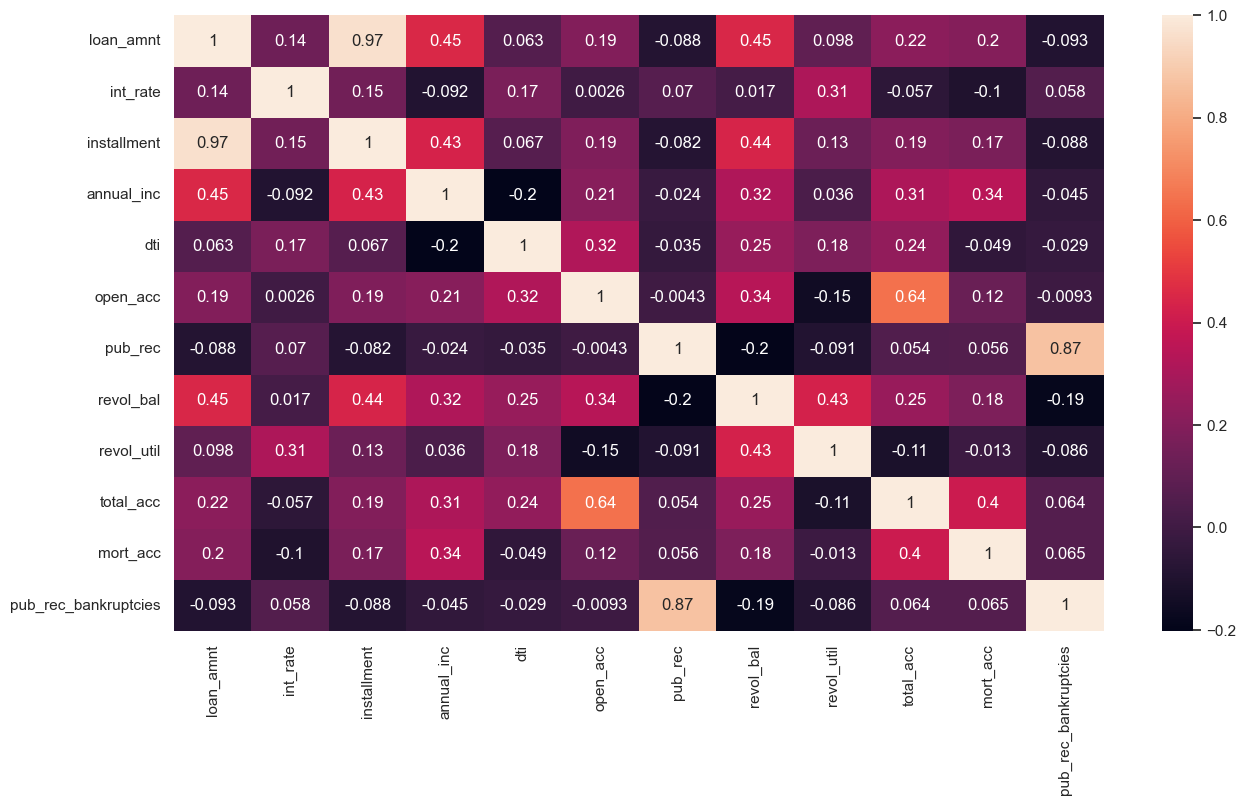

In [163]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(method='spearman'), annot=True)

- The spearman correlation coefficient between **Loan Amount** and **Installment** is very high (0.97).

- **=> This indicates high multicollinearity between these two features. This will result in high VIF value.**

- **=> One of them can be dropped while training the model**



## Dropping the columns "application_type", "revol_bal", 'Loan_amount', 'Issue_d', 'purpose', 'title', 'address'

#### 'tilte' and 'purpose' are just the type of loan that is filled by the customers only, which should not have a significance on the loan repayment

In [544]:
df.drop(columns=['application_type', 'revol_bal', 'loan_amnt', 'issue_d', 'purpose', 'title', 'address'], axis =1, inplace=True)

# Missing Values Treatment

In [390]:
df.isnull().sum()/len(df)*100

term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.973426
emp_length              4.893534
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.066621
total_acc               0.000000
initial_list_status     0.000000
mort_acc                9.823795
pub_rec_bankruptcies    0.134666
dtype: float64

### Median Imputation for these 3 columns

In [545]:
df['mort_acc'].fillna(df['mort_acc'].median(), inplace=True)
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [492]:
df.isnull().sum()/len(df)*100

term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.973426
emp_length              4.893534
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

### The maximum percentage of missing value is 5.9%
### Mean imputation doeas not make sense here as the target variable is a binary class;    Mode imputation might lead to imbalance data, KNN can be doen on numerical features.
### Dropping the missing values seems ok

In [546]:
df.dropna(inplace=True)

In [547]:
df.shape

(330093, 20)

# Feature Engineering

In [548]:
# Creation of Flags
df['pub_rec_flag'] = (df['pub_rec'] > 1.0).astype(int)

df['mort_acc_flag'] = (df['mort_acc'] > 1.0).astype(int)

df['pub_rec_bankruptcies_flag'] = (df['pub_rec_bankruptcies'] > 1.0).astype(int)

## Using "OHE Encoder" on Categorical feature with 2 categories

In [549]:
# Mapping of target variable 
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [550]:
columns_to_encode = ['term', 'initial_list_status']

df = pd.get_dummies(df, columns=columns_to_encode)

## Using "Ordinal Encoder" on features 'grade' and 'sub_grade'. There is inherent order in these 2 categories

In [551]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df[['grade', 'sub_grade']] = encoder.fit_transform(df[['grade', 'sub_grade']])

## Creating a new feture 'Credit_line_age' and dropping the feature 'earliest_cr_line'

In [552]:
# Convert to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

# Extract year
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

# Calculate age of credit line
current_year = pd.to_datetime('now').year
df['credit_line_age'] = current_year - df['earliest_cr_year']

# Drop the original and Year column
df.drop(columns=['earliest_cr_line', 'earliest_cr_year'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


## Using "Target Encoder" on rest of the Categorical feature

In [553]:
from category_encoders import TargetEncoder

# Define the columns to encode
columns_to_encode = ['emp_title', 'emp_length', 'home_ownership', 'verification_status']

encoder = TargetEncoder()

for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col], df['loan_status'])

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330093 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   int_rate                   330093 non-null  float64
 1   installment                330093 non-null  float64
 2   grade                      330093 non-null  float64
 3   sub_grade                  330093 non-null  float64
 4   emp_title                  330093 non-null  float64
 5   emp_length                 330093 non-null  float64
 6   home_ownership             330093 non-null  float64
 7   annual_inc                 330093 non-null  float64
 8   verification_status        330093 non-null  float64
 9   loan_status                330093 non-null  int64  
 10  dti                        330093 non-null  float64
 11  open_acc                   330093 non-null  float64
 12  pub_rec                    330093 non-null  float64
 13  revol_util                 33

# Model Training

In [555]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state =42, stratify=y)

In [556]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [557]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [558]:
model.coef_

array([[-0.01703688,  0.10487423, -0.00872483,  0.42716283,  1.41479204,
         0.06181792,  0.13596491, -0.01004492,  0.04478065,  0.14289455,
         0.14850277,  0.01155151,  0.143412  , -0.04698345, -0.0454717 ,
        -0.06160427, -0.00913419, -0.03039242,  0.01710307, -0.12021289,
         0.12021289,  0.04212194, -0.04212194,  0.03189104]])

In [532]:
model.intercept_

array([-2.08309479])

In [559]:
import pandas as pd

# Assuming X_train_cols contains feature names and model.coef_ contains coefficients

coefficients = model.coef_[0]

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': X_train_cols, 'Coefficient': coefficients})

coefficients_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
4,emp_title,1.414792
3,sub_grade,0.427163
10,open_acc,0.148503
12,revol_util,0.143412
9,dti,0.142895
6,home_ownership,0.135965
20,term_ 60 months,0.120213
1,installment,0.104874
5,emp_length,0.061818
8,verification_status,0.044781


## Accuracy score of train and test data

In [560]:
print(f'Training Accuracy:{model.score(X_train,y_train)}')
print(f'Test Accuracy:{model.score(X_test,y_test)}')

Training Accuracy:0.8697373257556479
Test Accuracy:0.8705831030972808


In [561]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix 

array([[63149,  3370],
       [ 7310,  8695]], dtype=int64)

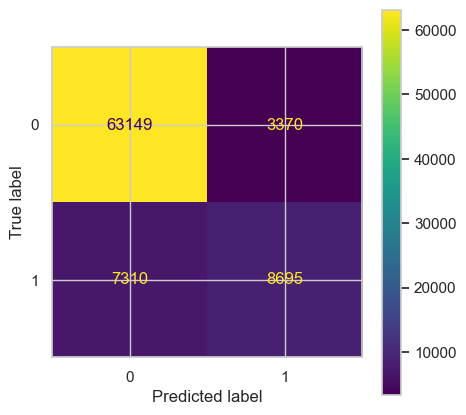

In [562]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

## Finding Accuracy using Confusion Matrix

In [563]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.8705831030972808

In [564]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     66519
           1       0.72      0.54      0.62     16005

    accuracy                           0.87     82524
   macro avg       0.81      0.75      0.77     82524
weighted avg       0.86      0.87      0.86     82524



In [565]:
total_instances = 63255 + 3378 + 7274 + 8617  # Total instances in the confusion matrix

# Calculate percentages
percentage_FP = (3378 / total_instances) * 100
percentage_FN = (7274 / total_instances) * 100

print("Percentage of False Positives (FP): {:.2f}%".format(percentage_FP))
print("Percentage of False Negatives (FN): {:.2f}%".format(percentage_FN))


Percentage of False Positives (FP): 4.09%
Percentage of False Negatives (FN): 8.81%


## Interpretation:¶
- **90% of the instances predicted as class 0 were actually class 0, and 72% of the instances predicted as class 1 were actually class 1.**
- **95% of the actual instances of class 0 were correctly predicted as class 0, but only 54% of the actual instances of class 1 were correctly predicted as class 1.**
- **F1-score balances precision and recall. A higher F1-score indicates a better balance between precision and recall.**
- **Overall accuracy is 0.87, meaning that the model correctly predicted the target variable in approximately 87% of the instances.**
- **Weighted Avg precision is 0.86, recall is 0.87, and F1-score is 0.86.**

#### => Recall score: 0.95 and Precision score: 0.90. Which tells us that there are more false positives than the false negatives.

#### => From Confusion Matrix it can be seen that FP = 4% of total cases & FN = 9% of Total Cases

#### => If Recall value is low (i.e. FN are high), it means Bank's NPA (defaulters) may increase.

#### => If Precision value is low (i.e. FP are high), it means Bank might loose out on an opportunity to finance more individuals and earn interest on it.

# Hyperparameter Tuning

In [484]:
def acc(y_test,y_pred):
    return np.sum(y_test==y_pred)/len(y_test)

c = np.logspace(-3, 3, 7)

Accuracy_score = []
for i in c:
    lgr = LogisticRegression(penalty='l2',random_state=42, C=i)
    lgr.fit(X_train,y_train)
    y_pred = lgr.predict(X_test)
    Accuracy_score.append(acc(y_test,y_pred))
    print(i,acc(y_test,y_pred))

0.001 0.8705831030972808
0.01 0.8709829867674859
0.1 0.8709345160195822
1.0 0.8709223983326063
10.0 0.8709223983326063
100.0 0.8709223983326063
1000.0 0.8709223983326063


In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
    scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = accuracy(y_train, scaled_lr.predict(X_train))
    val_score = accuracy(y_val, scaled_lr.predict(X_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

In [446]:
range_of_C = np.arange(0.01, 500.0, 10)
train_scores = []
test_scores = []
for i in range_of_C:
    model = LogisticRegression(C=1/i)
    model.fit(X_train, y_train)
    tr_score = model.score(X_train,y_train)
    train_scores.append(tr_score)
    tst_score = model.score(X_test,y_test)
    test_scores.append(tst_score)

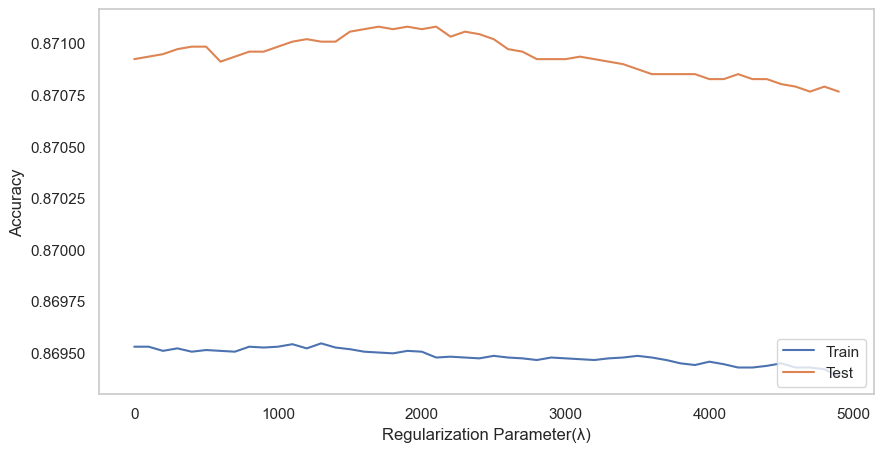

In [447]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="Train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), test_scores, label="Test")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

- **We see that changing the value of C does not make any difference in performance**

In [459]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2']}
logreg = LogisticRegression()

# Using K-fold method with k=5
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Hyperparameters:', grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print('*' * 50)
print('Accuracy:', round(accuracy * 100, 2), '%')


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
**************************************************
Accuracy: 87.1 %


## Regularization and hyperparameter tuning(c) is not making any difference

**ROC Curve -**
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: 
- True Positive Rate
- False Positive Rate
- True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows: TPR=(TP)/(TP+FN)
- False Positive Rate (FPR) is defined as follows: FPR=(FP)/(FP+TN)

- An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

In [460]:
from sklearn.metrics import roc_auc_score, roc_curve

probability = model.predict_proba(X_test)

In [463]:
probability

array([[0.89100821, 0.10899179],
       [0.34676247, 0.65323753],
       [0.26874922, 0.73125078],
       ...,
       [0.87951164, 0.12048836],
       [0.96266857, 0.03733143],
       [0.2970843 , 0.7029157 ]])

**Observe**

```Probability``` variable contains 2 probability $P(Y=0 |X)$ and $P(Y=1 |X )$

#### But for thresholding we need only one probability, what can be done ?

Ans: lets consider only $ p = P(Y=1 |X) $


In [464]:
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

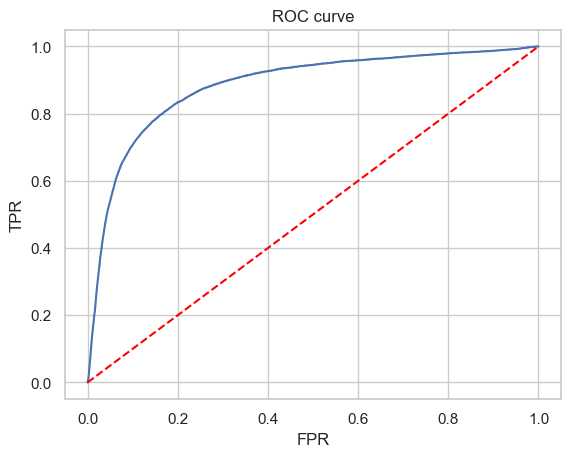

In [466]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [467]:
# Calculate ROC AUC score
roc_auc_score(y_test,probabilites)

0.8836359699764297

In [468]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thr = precision_recall_curve(y_test, probabilites)

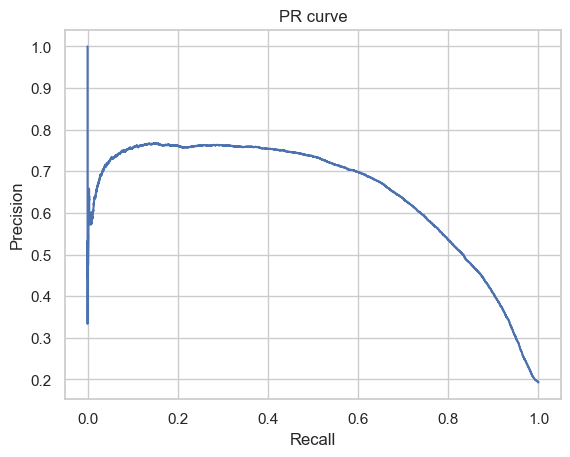

In [469]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [470]:
auc(recall, precision)

0.6478590628636132

In [472]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):
        
    model.fit(X_train, y_train)

    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)

    train_score = f1_score(y_train, train_y_pred)
    test_score = f1_score(y_test, test_y_pred)

    return train_score,test_score


In [475]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 258.0/258.0 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [477]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_sm.value_counts())

lgr_model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(lgr_model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')



Before SMOTE
0    199441
1     48128
Name: loan_status, dtype: int64
After Oversampling
0    199441
1    199441
Name: loan_status, dtype: int64
Training F1 score:0.8171816767006594, Testing F1 score:0.6482421120412105


In [479]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

calc_vif(X)[:5]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
22,initial_list_status_w,inf
21,initial_list_status_f,inf
20,term_ 60 months,inf
19,term_ 36 months,inf
3,sub_grade,42.64


In [480]:
calc_vif(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
22,initial_list_status_w,inf
21,initial_list_status_f,inf
20,term_ 60 months,inf
19,term_ 36 months,inf
3,sub_grade,42.64
2,grade,22.26
0,int_rate,20.81
11,pub_rec,3.66
14,mort_acc,3.09
17,mort_acc_flag,2.94


## There are a few features with vif=inf and a few more with vif>5
## we can also consider removing those features and retraining the model

## Insights and Recommendations:¶
**1. Model Performance Metrics:**
- Accuracy: Achieved an overall accuracy of 87% indicating the model's ability to correctly classify instances.

**2. Classification Report Analysis:**
- Class 0 (Non-Defaulters): High precision (90%) and recall (95%). Demonstrates reliable identification of non-defaulters, minimizing false negatives.

- Class 1 (Defaulters): Precision at 72%, indicating areas for improvement in avoiding false positives. Recall at 54%, suggesting the need to capture more instances of actual defaulters.